<div style="padding:30px; color: white; background-color: #0071CD">
    <center>
        <img src="img/logoub.jpeg">
    <center>
        <h1>Algorísmica Avançada</h1>
        <h2>Problemes 1 - Grafs no dirigits, complexitat</h2>
    </center>
</div>

In [52]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [53]:
# executeu aquesta cell per tenir tots els moduls necesaris pel notebook
from collections import defaultdict
import networkx as nx
import numpy as np

Cal tenir-ne instalat alguns moduls de python per aquesta clase (si feu servir jupyter o google collab, probablement els teniu instalats), en cas que no els tingueu executeu les comandes següents dins d'una cel·la:

`!pip install numpy networkx matplotlib scipy`
o
`!pip3 install numpy networkx matplotlib scipy`

En cas que ho voleu executar en terminal, feu servir:

`python -m pip install numpy networkx matplotlib scipy`

## Anaconda

Si encara no teniu Anaconda instal·lada, podeu descarregar l'instal·lador [AQUÍ](https://www.anaconda.com/products/individual).

Un cop instal·lat, podeu obrir el programa __Anaconda Navigator__ per a gestionar els entorns (environments). Des d'aquí podreu crear-ne de nous i/o instal·lar llibreries noves a entorns existents. Us animem a crear un entorn dedicat per a l'assignatura.

Des d'aquí també podreu executar __jupyter notebook__.

## Defaultdict

La funció `defaultdict()` ens permet definir un diccionari que no ens retorna error si intentem accedir amb una clau que no existeix. En el cas que ho intentem, crearà una nova entrada amb un valor per defecte que haguem prefixat.

Exemple:

In [54]:
from collections import defaultdict

# Hem d'inicialitzar-ho amb una funció que es pugui cridar quan no es troba la clau. Per exemple, la funció 
# int() ens retornarà el valor 0.

# Observeu que el paràmetre que li passem és una funció. En cas que li passem int(), ens retornarà error.
dd = defaultdict(int)
dd[3] = 'Assignat!'

# Observeu que el tipus de diccionari no és 'dict'.
print(f'Un diccionari usual de python:', {3: 'Assignat'})
print(f'Podem assignar elements com en un diccionari normal: {dd}')
print(f'Si provem de cridar-ho amb una clau inexistent... {dd[4]}')

Un diccionari usual de python: {3: 'Assignat'}
Podem assignar elements com en un diccionari normal: defaultdict(<class 'int'>, {3: 'Assignat!'})
Si provem de cridar-ho amb una clau inexistent... 0


In [55]:
dd

defaultdict(int, {3: 'Assignat!', 4: 0})

In [56]:
# Podem definir funcions d'inicialitazció
def myfunc():
    return 'No assignat'

dd = defaultdict(myfunc)
print(dd[0])

# I de forma més breu, en sintaxi Python3 podem utilitzar 'lambda'
# que ens permet definir 'funcions inline'
dd = defaultdict(lambda: 'No assignat en Python3')
print(dd[0])

No assignat
No assignat en Python3


## Classes en Python 

Les classes en python tenen l'estructura següent:

```python
class MyClass:
    # La funció init permet crear els objectes del tipus 'MyClass'. Rep com a primer paràmetre 'self' i
    # pot rebre'n d'altres. Aquesta funció també defineix els atributs de la classe.
    def __init__(self, ...):
        self.atribut1 = ...
        self.atribut2 = ...
```

Veiem-ne un exemple

In [57]:
class Estudiant:
    def __init__(self, nom, assignatura):
        self.nom = nom
        self.assignatura = assignatura
        
    # La funcio 'repr' ens permet definir què passa quan fem un print d'aquest objecte.
    # En aquest cas, imprimim informació sobre l'estudiant i l'assignatura que cursa.
    # Observa que hem d'accedir als atributs usant self
    def __repr__(self):
        return f"L'estudiant {self.nom} cursa l'assignatura: {self.assignatura}"
    
    # Totes les funcions que definim dins una classe han de tenir com a primer paràmetre 'self'
    def canvi_assignatura(self, nova_assignatura):
        self.assignatura = nova_assignatura

In [58]:
est = Estudiant('Miquel', 'Algorísmica')
print(est)
est.canvi_assignatura('Algorísmica Avançada')
print(est)

L'estudiant Miquel cursa l'assignatura: Algorísmica
L'estudiant Miquel cursa l'assignatura: Algorísmica Avançada


## Starred expression

Una funcionalitat molt útil de python que cal conèixer (si no l'heu vist encara).
Definim una funció:

In [59]:
def suma(a,b):
    return a+b

# Podem cridar la funció passant dos paràmetres
print(suma(2,4))

6


Observeu que aquesta funció necessita dos paràmetres. Utilitzant el símbol `*` podem obtenir el mateix resultat passant una sola llista.

In [60]:
suma(*[2,4])

6

L'operador * extreu els elements d'una col·lecció i els passa com a paràmetres separats.

Podem fer el mateix al definir la funció:

In [61]:
def suma2(*valors):
    return sum(valors)

suma2(1,2,3,4,5)

15

Aquesta funció, pot rebre ara qualsevol nombre de paràmetres. `valors` es converteix en una llista d'elements i la funció `sum` en retornarà la suma.

## La funció `zip()`

La funció `zip()` ens permet combinar múltiples llistes en una de sola o fer la operació inversa. A l'executar la funció zip ens retornarà un objecte de tipus zip que podem convertir a una altre estructura de dades passant-li com a argument. Observa els exemples següents:

In [62]:
llista1 = [2,4,6,8,10]
llista2 = ['A','B','C','D','E']
llista3 = [1,2,3]
llista4 = [('A', 1), ('B', 2), ('C', 3), ('D', 4)]

In [63]:
# Observa que a l'executar zip ens retorna un objecte de tipus zip
print(zip(llista1, llista2))

In [64]:
# El podem convertir en una llista cridant 'list' o a un diccionari cridant 'dict'
print(list(zip(llista1, llista2)))
print(dict(zip(llista1, llista2)))

[(2, 'A'), (4, 'B'), (6, 'C'), (8, 'D'), (10, 'E')]
{2: 'A', 4: 'B', 6: 'C', 8: 'D', 10: 'E'}


In [65]:
# Si les dimensions no coincideixen, es redueix a la llista més curta
print(list(zip(llista2, llista3)))

[('A', 1), ('B', 2), ('C', 3)]


In [66]:
# Podem fer la operació inversa, és a dir, extreure d'una llista de parelles dues llistes, usant 
# zip i starred expression alhora
lst1, lst2 = zip(*llista4)
print(lst1)
print(lst2)

('A', 'B', 'C', 'D')
(1, 2, 3, 4)


__Alerta:__ La funció `zip` retorna un generador. Un cop esgotat, un generador quedarà buit. Observa què passa si fem:

In [67]:
llista1 = [2,4,6,8,10]
llista2 = ['A','B','C','D','E']

z = zip(llista1, llista2)

# Esgotem el generador, llegint-ne tots els elements
print(list(z))

# El generador està buit, per tant el diccionari també ho estarà
print(dict(z))

[(2, 'A'), (4, 'B'), (6, 'C'), (8, 'D'), (10, 'E')]
{}


## DFS: Depth First Search

L'algorisme __DFS__ (_Depth First Search_ o Cerca en profunditat) ens permet recórrer un graf de forma exhaustiva, és a dir, visitant tots els nodes, sempre i quan el graf estigui totalment connectat i sigui un graf no dirigit.

Com el seu nom indica, aquest algorisme prioritza la cerca en profunditat, és a dir, explorarà un sol veí de cada node per intentar arribar el més lluny possible.
Existeixen diferents ordres generats per l'algorisme DFS, els més comuns són:
- __Preordre__: En cas que no indiquem cap recorregut concret, aquest és el recorregut per defecte. Es visiten els nodes a mesura que ens els anem trobant en el recorregut.
- __Postordre__: Es visiten els nodes quan ja hem arribat al final del recorregut i estem recorrent el camí de tornada.

En general sempre farem servir __preordre__ a no ser que s'indiqui el contrari.

In [68]:
import networkx as nx
nx.__version__

'3.5'

### Visualització

Podeu trobar exemples a "[Drawing](https://networkx.org/documentation/stable/auto_examples/index.html#drawing)".<br>
En el cas que obtingueu un error durant la visualització, executeu una de les comandes:

`pip3 install decorator -U`<br>
`pip install decorator -U`

i reinicieu el kernel

Preordre. Node inicial: 7
DFS: [7, 6, 5, 1, 8, 4, 3, 2, 9]

Postordre. Node inicial: 7
DFS: [1, 5, 6, 2, 9, 3, 4, 8, 7]


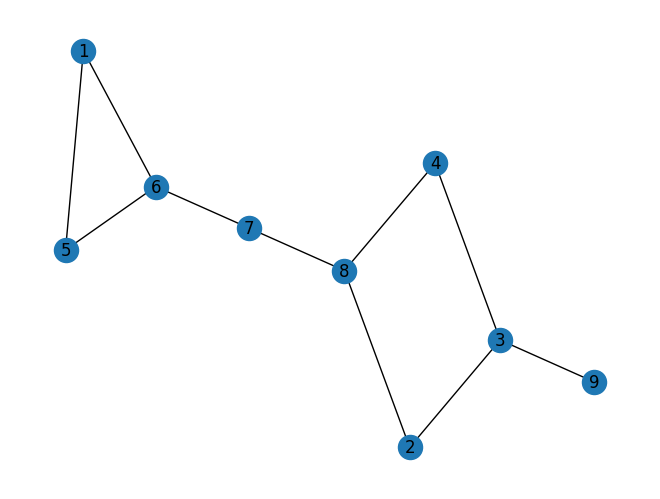

In [69]:
G = nx.Graph()
G.add_edges_from([(2,3),(3,4),(1,5),(5,6),(6,7),(7,8),(4,8),(1,6),(2,8),(3,9)])
nx.draw_kamada_kawai(G, with_labels=True)

print('Preordre. Node inicial: 7\nDFS:', list(nx.algorithms.traversal.depth_first_search.dfs_preorder_nodes(G, 7)))
print()
print('Postordre. Node inicial: 7\nDFS:', list(nx.algorithms.traversal.depth_first_search.dfs_postorder_nodes(G, 7)))

## Representació de grafs. Construcció d'un graf no dirigit des de zero

### Llista d'adjacència

Podem representar un graf utilitzant una llista d'adjacència. Cada node conté una llista de totes les connexions que té. Un exemple:

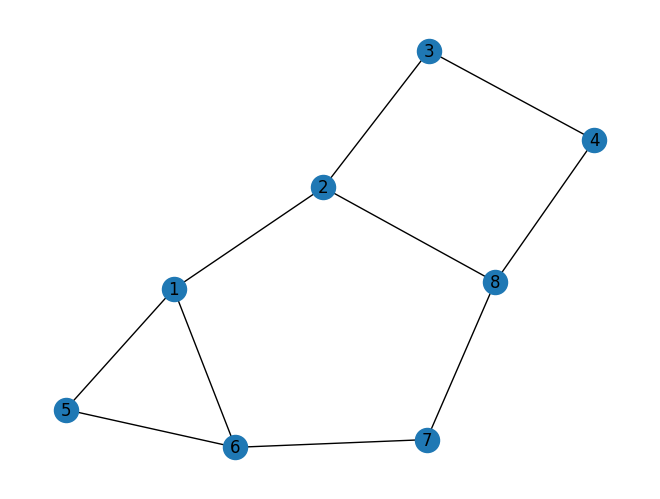

In [70]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,4),(1,5),(5,6),(6,7),(7,8),(4,8),(1,6),(2,8)])
nx.draw_kamada_kawai(G, with_labels=True)

Quina és la llista d'adjacència que representa aquest graf? 
Per construir-la, hem d'apuntar tots els veïns de cada node.

$$\begin{aligned}
1&\longrightarrow [2,5,6]\\
2&\longrightarrow [1,3,8]\\
3&\longrightarrow [2,4]\\
4&\longrightarrow [3,8]\\
5&\longrightarrow [1,6]\\
6&\longrightarrow [1,5,7]\\
7&\longrightarrow [6,8]\\
8&\longrightarrow [2,4,7]\\
\end{aligned}$$

Definim una classe que ens permeti construir grafs usant la llista d'adjacència

<div class="alert alert-success">
<p>Implementeu les funcions:
    <ol><li> <b>add_edge</b>: Donats dos nodes, crea una aresta entre ells.
        <li> <b>has_edge</b>: Donats dos nodes, comprova si existeix una aresta que els connecta.
    </ol></p>    
    
</div>

In [71]:
class AdjListGraph:
    def __init__(self):
        # Usem un defaultdict i inicialitzem a un conjunt.
        # D'aquesta forma evitem tenir repeticions.
        # Cada clau del diccionari 'adj' tindrà per defecte un conjunt buit
        self.adj = defaultdict(set)
    
    def __repr__(self):
        # Al fer print del graf, es mostraran els nodes i les arestes
        return f'G(nodes={self.nodes()}, edges={self.edges()})'
        
    def nodes(self):
        # Els nodes són les claus del diccionari 'adj'
        return list(self.adj.keys())
    
    def edges(self):       
        # Les arestes son totes les parelles formades per una clau i un element del conjunt
        return [(k,v) for k,nei in self.adj.items() for v in nei]        
            
    def add_node(self, node):
        # Afegim un node
        if node not in self.adj:
            self.adj[node] = set()   
    
    def add_edge(self, node1, node2):
        self.adj[node1].add(node2)
        self.adj[node2].add(node1)
        return
    
    def has_edge(self, node1, node2):
        return node1 in self.adj[node2]
        
    
    def add_nodes_from(self, node_list):
        # Afegim nodes des d'una llista
        for n in node_list:
            self.add_node(n)
    
    def add_edges_from(self, edge_list):
        # Afegim arestes des d'una llista.
        # Observa que 'e' es una parella de índexs. Utilitzem l'starred expression per 
        # transformar 'e' en dos paràmetres per a la funció 'add_edge'
        for e in edge_list:
            self.add_edge(*e)
            
    def draw(self, ax=None):
        # Mostrem el graf usant networkx
        nx.draw_kamada_kawai(nx.Graph([(i,j) for i in self.adj.keys() for j in self.adj[i]]), ax=ax, with_labels=True)
            
    def dfs(self, visited, current_node, display=True):
        # Versió recursiva del DFS.
        if current_node not in visited:
            if display:
                print(current_node, end=' ')
            visited.add(current_node)
            
            # Per a cada veí del node actual, cridem de nou a la funció DFS per seguir visitant
            for nei in self.adj[current_node]:
                self.dfs(visited, nei, display=display)
        

Nodes del graph: [1, 2, 3, 4, 5, 6, 7, 8]
Arestes del graph: [(1, 2), (1, 5), (1, 6), (2, 8), (2, 1), (2, 3), (3, 2), (3, 4), (4, 8), (4, 3), (5, 1), (5, 6), (6, 1), (6, 5), (6, 7), (7, 8), (7, 6), (8, 2), (8, 4), (8, 7)]
DFS: 7 8 2 1 5 6 3 4 

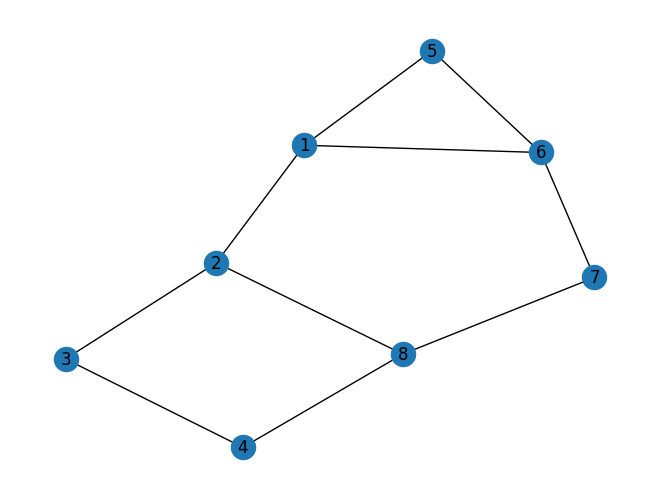

In [72]:
# Creem un nou objecte de la classe i hi afegim arestes
g = AdjListGraph()
g.add_edges_from([(1,2),(2,3),(3,4),(1,5),(5,6),(6,7),(7,8),(4,8),(1,6),(2,8)])

# Mostrem informació del graf
print(f"Nodes del graph: {g.nodes()}")
print(f"Arestes del graph: {g.edges()}")

# Recorrem el graf amb un DFS
print('DFS:', end=' ')
g.dfs(set(), 7)

g.draw()

In [73]:
g.adj

defaultdict(set,
            {1: {2, 5, 6},
             2: {1, 3, 8},
             3: {2, 4},
             4: {3, 8},
             5: {1, 6},
             6: {1, 5, 7},
             7: {6, 8},
             8: {2, 4, 7}})

### Matriu d'adjacència

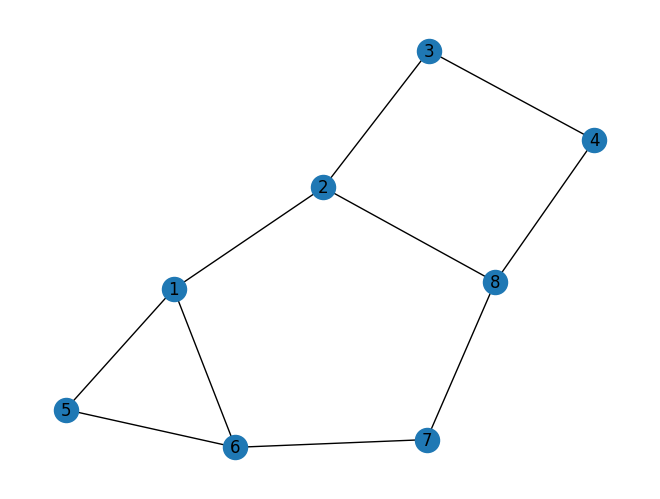

In [74]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,4),(1,5),(5,6),(6,7),(7,8),(4,8),(1,6),(2,8)])
nx.draw_kamada_kawai(G, with_labels=True)

En el cas de la representació usant una matriu d'adjacències, hem de crear una matriu de tamany $|N|\times |N|$ on $N$ és la llista de nodes del Graph. Per a cada posició de la matriu $M$:<br><br>
$$M(i,j) = \begin{cases} 1 \ \ \ \ \text{ si existeix una aresta que connecta } i \text{ amb } j \\
 0 \ \ \ \ \text{ si no hi ha aresta de } i \text{ a } j 
\end{cases}$$

La matriu d'adjacència del graf anterior és:
$$
\begin{array}{c|cccccccc}
{} & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8\\
\hline
1 & 0 & 1 & 0 & 0 & 1 & 1 & 0 & 0\\
2 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 1\\
3 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
4 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1\\
5 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
6 & 1 & 0 & 0 & 0 & 1 & 0 & 1 & 0\\
7 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1\\
8 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 0\\
\end{array}
$$

Observeu que, al ser un graf no dirigit, la matriu que en resulta és simètrica. Sempre que existeixi l'aresta $(i,j)$ existirà també l'aresta $(j,i)$.

<div class="alert alert-success">
<p>Implementeu les funcions:
    <ol><li> <b>add_edge</b>: Donats dos nodes, crea una aresta entre ells.
        <li> <b>has_edge</b>: Donats dos nodes, comprova si existeix una aresta que els connecta.
    </ol></p>    
    
</div>

In [75]:
import numpy as np
class AdjMatrixGraph:
    def __init__(self, nodes):        
        # Inicialitzem una matriu buida
        self.matrix = [[0 for _ in nodes] for _ in nodes]
        # Assignem a cada node un valor enter que usarem per accedir a la matriu
        self.n2p = dict(zip(nodes, range(len(nodes))))
    
    def __repr__(self):
        # Al fer print del graf, es mostraran els nodes i la matriu d'adjacència.
        return f"Nodes: {list(self.n2p.keys())}\nMatriu d'adjacència:\n{np.array(self.matrix)}"
                        
    def nodes(self):
        # Els nodes són les claus del diccionari 'n2p'.
        return list(self.n2p.keys())
    
    def edges(self):
        return [(k1,k2) for k1,v1 in self.n2p.items() for k2, v2 in self.n2p.items() if self.matrix[v1][v2]==1]
        
    def add_edge(self, node1, node2):
        self.matrix[self.n2p[node1]][self.n2p[node2]] = 1
        self.matrix[self.n2p[node2]][self.n2p[node1]] = 1
        return
    
    def has_edge(self, node1, node2):
        return self.matrix[self.n2p[node1]][self.n2p[node2]] == 1
        
    def add_edges_from(self, edge_list):
        # Afegim arestes des d'una llista.
        # Observa que 'e' es una parella de índexs. Utilitzem l'starred expression per 
        # transformar 'e' en dos paràmetres per a la funció 'add_edge'
        for e in edge_list:
            self.add_edge(*e)
    
    def draw(self, ax=None):
        # Mostrem el graf usant networkx
        nx.draw_kamada_kawai(nx.Graph(self.edges()), ax=ax, with_labels=True)
            
    def dfs(self, visited, current_node, display=True):
        # Versió recursiva del DFS
        if current_node not in visited:
            if display:
                print(current_node, end=' ')
            visited.add(current_node)
            
            # Recorrem tots els nodes del graf
            for nei in self.nodes():
                
                # Si el node actual està connectat amb un altre node, seguim visitant-lo cridant a DFS.
                if self.matrix[self.n2p[current_node]][self.n2p[nei]]==1:
                    self.dfs(visited, nei, display=display)        

Nodes: [1, 2, 3, 4, 5, 6, 7, 8]
Matriu d'adjacència:
[[0 1 0 0 1 1 0 0]
 [1 0 1 0 0 0 0 1]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 1]
 [1 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 1]
 [0 1 0 1 0 0 1 0]]
DFS: 7 6 1 2 3 4 8 5 

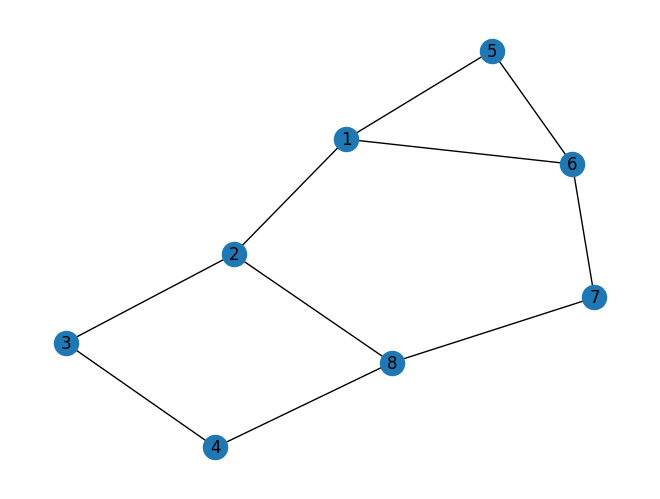

In [76]:
g = AdjMatrixGraph([1,2,3,4,5,6,7,8])
g.add_edges_from([(1,2),(2,3),(3,4),(1,5),(5,6),(6,7),(7,8),(4,8),(1,6),(2,8)])
print(g)
print("DFS:", end=" ")
g.dfs(set(), 7)

g.draw()

La funció `timeit` al començament d'una cel·la ens permet saber el temps d'execució d'un fragment de codi, observa:

In [77]:
%%timeit -n 1000
for i in range(1000):
    continue

37.7 μs ± 10.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<div class="alert alert-success">
<h1>Problema 1</h1>
<p>Crea un graf utilitzant les dues estructres (llista i matriu) que tingui com a nodes: 0,...,20. <br>
    Crea arestes de forma que el graf resultant sigui un cercle (cada node amb dues conexions). <br>
    Visualitza el graf.</p>    
    
</div>

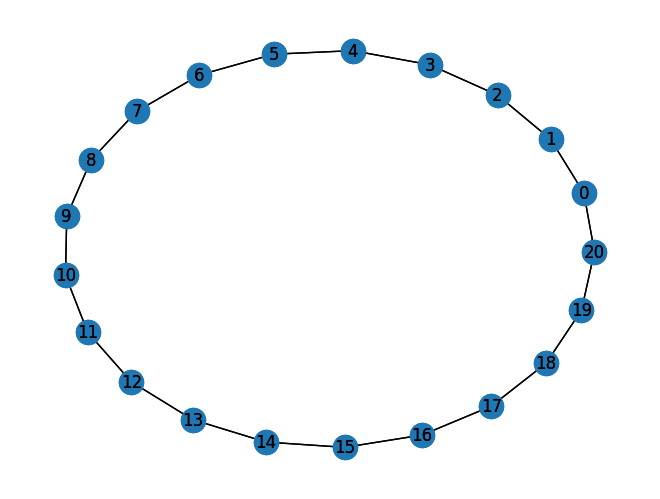

In [78]:
# EL TEU CODI AQUÍ

g1 = AdjListGraph()
for i in range(21):
    g1.add_edge(i, (i+1)%21)
g1.draw()

g2 = AdjMatrixGraph(list(range(21)))
for i in range(21):
    g2.add_edge(i, (i+1)%21)
g2.draw()

<div class="alert alert-success">
<h1>Problema 2</h1>
<p>
    Raoneu la resposta a les preguntes següents. Doneu la resposta en funció de $N$ (nombre de nodes) i de $E$ (nombre d'arestes).<br>
    <ol>
    <li><strong>Quina de les dues implementacions anteriors ocupa més espai en memòria? Quanta memòria ocupa cada una? <strong>
    <li><strong>Quin és el cost d'afegir un nou vèrtex?<strong>
    <li><strong>Quin és el cost d'afegir una nova aresta?<strong>
    <li><strong>Quin és el cost d'eliminar un vèrtex?<strong>  
    <li><strong>Quin és el cost d'eliminar una aresta?<strong>        
    <li><strong>Quin és el cost d'esbrinar si una aresta $(i,j)$, on $i,j$ són dos nodes del graf, existeix?<strong>   
    <li><strong>Quines diferències hi ha entre els dos DFS? Quina és la complexitat de cada un?<strong>   
    </ol>
        
     
</p>    
    
</div>

<div class="alert alert-warning">
<h1>Respostes</h1>
<ol>
    <li> La matriz ocupa más, con N^2 de espacio, mientras que la lista ocupa N+E.
    <li> En la lista cuesta gr(n), con n siendo el nuevo nodo, en la matriz cuesta N^2.
    <li> En ambas cuesta 1.
    <li> En la lista cuesta gr(n), con n siendo el nuevo nodo, en la matriz cuesta N^2.
    <li> En ambas cuesta 1.
    <li> En la lista cuesta gr(n), con n siendo el nuevo nodo, en la matriz cuesta 1.
    <li> En la lista, vamos a un nodo, lo mostramos, y recursamos sobre cada vecino de su lista de vecinos; mientras que en la matriz vemos un nodo, comprobamos toda la columna de adyacencia, y si encontramos un vecino, lo visitamos iterativamente, haciendo comprobaciones extras. La lista tiene complejidad N+E, la matriz N^3
    </ol>
    
</div>

<div class="alert alert-success">
<h1>Problema 3</h1>
<p>Crea un graf amb dues components connexes, és a dir, un graf on hi hagi dos grups de nodes connectats entre si però sense cap connexió entre els dos grups. <br>
    Què passa quan executes el DFS? <br>
    Té el mateix efecte en les dues implementacions? <br>
    Com ho hauríem de fer per mostrar tots els nodes?
</p>    
    
</div>

A B C D None


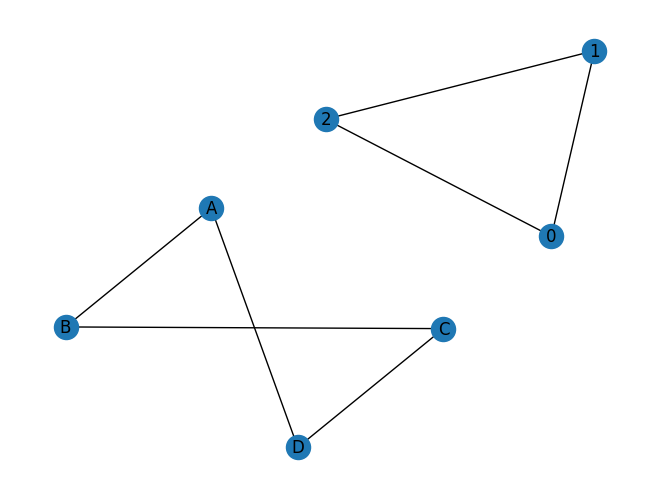

In [79]:
# EL TEU CODI AQUÍ
# Solamente se explora una isla.
# Sí, tiene el mismo efecto en ambas.
# En la lista podríamos hacer que se itere sobre self.adj en vez de empezar desde un nodo inicial llamando una función recursiva auxiliar.
# En la matriz, podríamos hacer que itere sobre todas las columnas, de la misma forma.

# Adj List.
g3 = AdjListGraph()
g3.add_edges_from([(0,1), (1,2), (2,0), ('A','B'), ('B','C'), ('C','D'), ('D','A') ])
g3.draw()
print(g3.dfs(set(), 'A'))


A B C D None


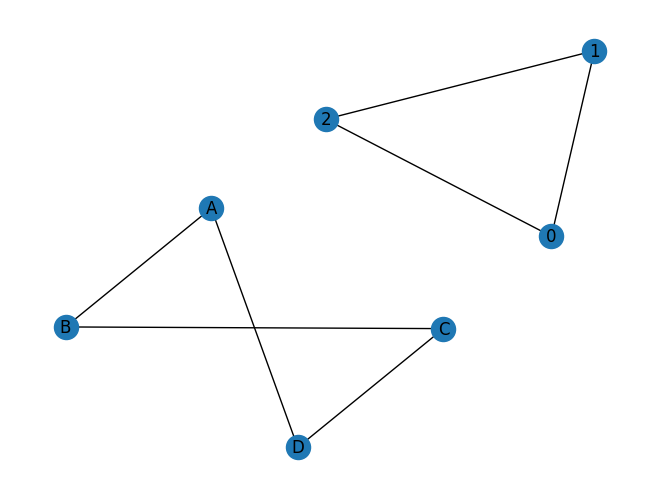

In [80]:
# Adj Matrix.
g4 = AdjListGraph()
g4.add_edges_from([(0,1), (1,2), (2,0), ('A','B'), ('B','C'), ('C','D'), ('D','A') ])
g4.draw()
print(g4.dfs(set(), 'A'))

<div class="alert alert-success">
<h1>Problema 4</h1>
    <p>Utilitzeu la funció d'inici de cel·la de jupyter <b>%%timeit</b> explicada anteriorment, per a comparar el DFS dels grafs creats al Problema 1 amb 100 nodes. Useu el paràmetre <b>display=False</b> per a que no imprimeixi el recorregut múltiples cops. Quin DFS és més ràpid? És coherent amb la complexitat que heu respost al Problema 2?<br>
</p>    
    
</div>

In [81]:

g5 = AdjListGraph()
for i in range(100):
    g5.add_edge(i, (i+1)%100)

g6 = AdjMatrixGraph(list(range(100)))
for i in range(21):
    g6.add_edge(i, (i+1)%100)


In [82]:
%%timeit -n 1000
g5.dfs(set(), 0, False)

82.4 μs ± 8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [83]:
%%timeit -n 1000
g6.dfs(set(), 0, False)

558 μs ± 54 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Efectivamente, la lista es bastante más rápida, pues su complejidad es E+N lineal mientras que la de la matriz es cúbica.